# 17010011002 Fatma Çetin

# Araştırma Sorularına ve Sonuçlarına Genel Bakış

 Projenin amacı, müşterilerin banka kampanyasına abone olup olmayacağını tahmin etmek, sınıflandırma yapmaktır. Proje sonunda;

 1- Hangi nitelikler sistemi en çok etkiliyor ? <br>
 2- Sisteme katkısı olmayan nitelikler nelerdir ? <br>
 3- Hangi algoritma ile yüksek başarı sağlanır ? <br>

gibi sorulara cevaplar bulunacaktır. Sistem başarılı olduğunda, banka çalışanları müşterilerle iletişim kurmadan önce, müşterinin verilerine göre, kampanyanın onaylanıp onaylanmayacağını tahmin eder ve sonuç olarak zamandan tasarruf etmiş olur.

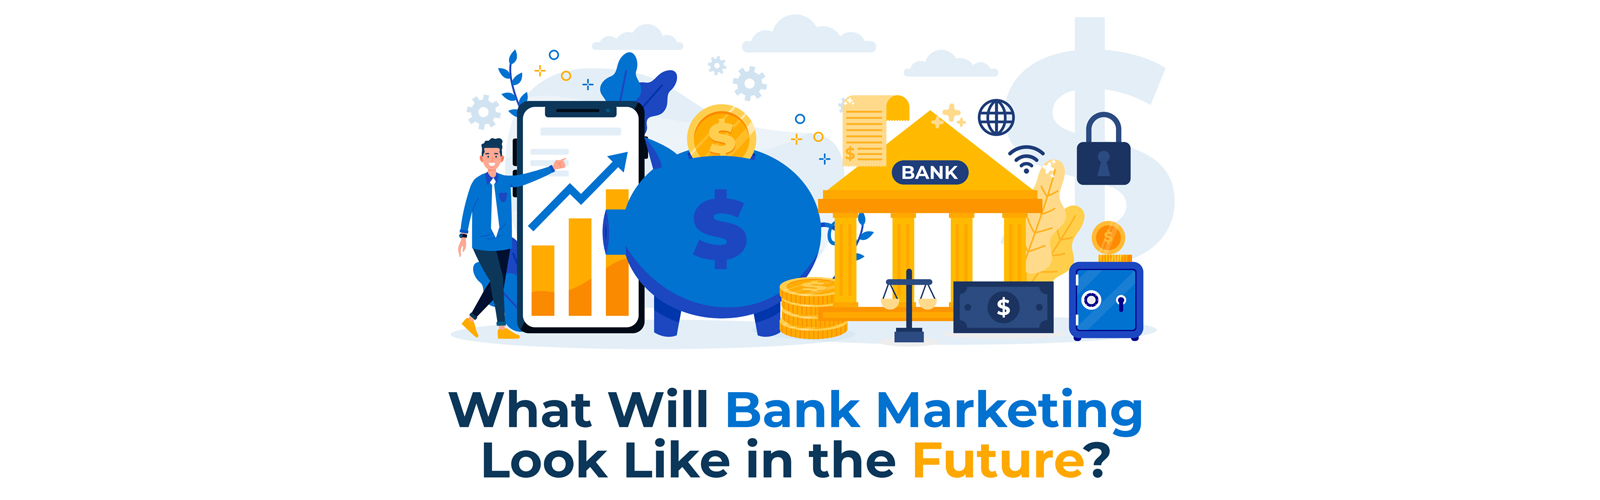

# Motivasyon ve Arka plan

Projenin amacını açıklarken de bahsettiğimiz gibi, bu proje banka çalışanlarının ve müşterilerin zamanını boşa harcamamak adına yapılmış bir projedir. Müşterinin niteliklerinden yola çıkarak, vereceği yanıtın hesaplanması, zamandan tasarruf açısından büyük öneme sahiptir. Zaman ise yoğun yaşam temposu içinde oldukça önemli bir kavramdır. Tahminler üzerine önceliğin, kampanyayı kabul edecek müşterilerle iletişime geçme konusuna verilmesiyle zamandan oldukça fazla tasarruf edilir ve banka çalışanlarının da iş performansında artış gözlenir.

# Bank Marketing Veri Kümesi ile İlgili Bilgiler

Veri seti bank marketing veri setidir ve https://www.kaggle.com/janiobachmann/bank-marketing-dataset adresinden alınmış ancak eksik veri problemi olmadığından manuel bir şekilde veri setindeki kullanıcıların (rastgele olarak) bazı bilgileri çıkarılmıştır. Veri setinde, 4521 kullanıcı verisi ve 17 nitelik bulunmaktadır. Algoritmada 16 giriş 1 çıkış olacak şekilde kullanılacaktır<br> Niteliklerden kısaca bahsedecek olursak,<br>
-age: Kullanıcı yaşı<br>
-job: Kullanıcı mesleği<br>
-marital: Kullanıcı medeni durumu<br>
-education: Kullanıcı eğitim seviyesi<br>
-default: Kullanıcının ödenmemiş borç durumu, banka dilinde temerrüde düşme durumu<br>
-balance: Kullanıcı bakiyesi<br>
-housing: Kullanıcının ev kredisi <br>
-loan: Kullanıcının bireysel kredisi durumu<br>
-contact: Kullanıcı ile kurulan iletişim yolu<br>
-day: Kullanıcı ile son iletişim kurulan gün<br> 
-month: Kullanıcı ile son iletişim kurulan ay<br> 
-duration: Kullanıcı ile son iletişim süresi, saniye cinsinden<br>
-campaign: Kullanıcı ile kurulan iletişim sayısı<br>
-pdays: Kullanıcı ile son iletişim üzerinden geçen gün sayısı<br>
-previous: Kullanıcı ve kampanyadan önceki iletişim sayısı<br>
-poutcome: Kullanıcının önceki kampanya için cevabı<br>

In [1]:
#Başlangıç için gerekli kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [10]:
df = pd.read_csv('VA_17_002VeriSeti.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4487 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4514 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4518 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   int64  
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 600.6+ KB


<AxesSubplot:>

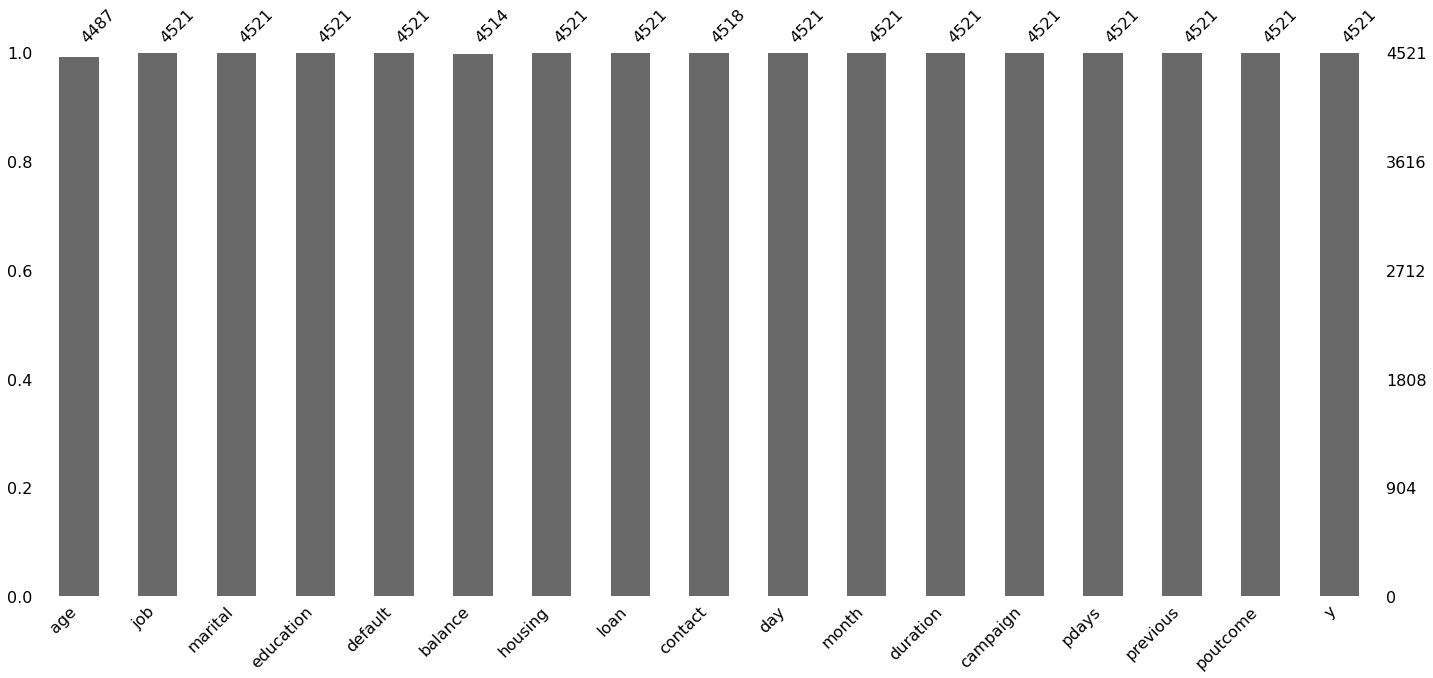

In [12]:
msno.bar(df)

<AxesSubplot:>

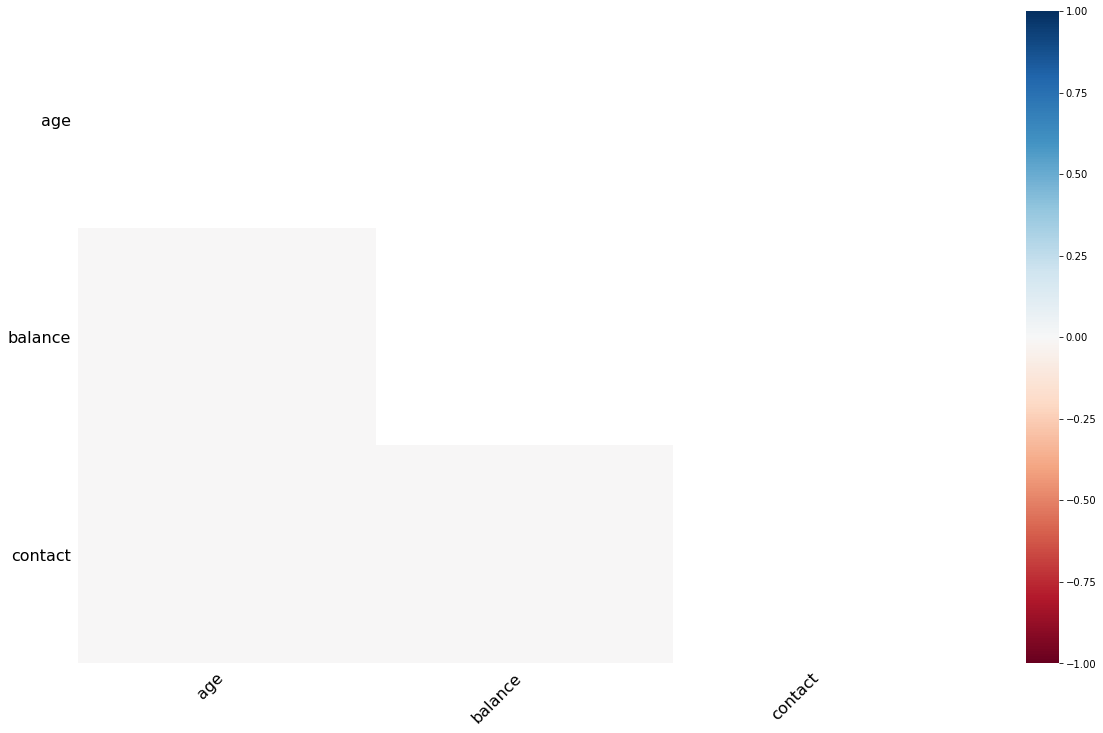

In [13]:
msno.heatmap(df)

In [14]:
#Kullanılmayacak columnların silinmesi
#bu iki ifade yerine iletişim üzerinden geçen gün sayısı verisini kullanmak daha mantıklı olacağı için siliyoruz
df = df.drop(columns=['day', 'month'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,79,1,-1,0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,220,1,339,4,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,185,1,330,1,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,199,4,-1,0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,226,1,-1,0,unknown,no


In [15]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,4487.000000,4514.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.208157,1424.863979,263.961292,2.793630,39.766645,0.542579
std,10.600469,3011.449333,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,70.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,446.500000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1481.500000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
df.describe(include=['O']) #sayısal olmayanları gösterir

,job,marital,education,default,housing,loan,contact,poutcome,y
count,4521,4521,4521,4521,4521,4521,4518,4521,4521
unique,12,3,4,2,2,2,3,4,2
top,management,married,secondary,no,yes,no,cellular,unknown,no
freq,969,2797,2306,4445,2559,3830,2894,3705,4000


# Eksik Veri Analizi ve Önişleme

In [17]:
df.isnull().sum() #veri setinin orijinalinde eksik veri bulunmuyordu, ancak problem çözümü adına, 
#manuel olarak eksik veri oluşturuldu

age          34
job           0
marital       0
education     0
default       0
balance       7
housing       0
loan          0
contact       3
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

<AxesSubplot:>

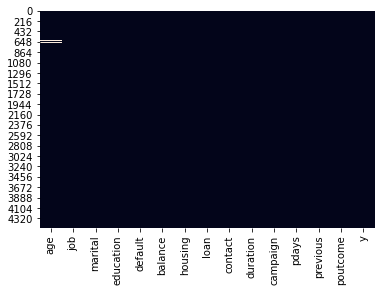

In [18]:
sns.heatmap(df.isnull(), cbar = False)

<AxesSubplot:>

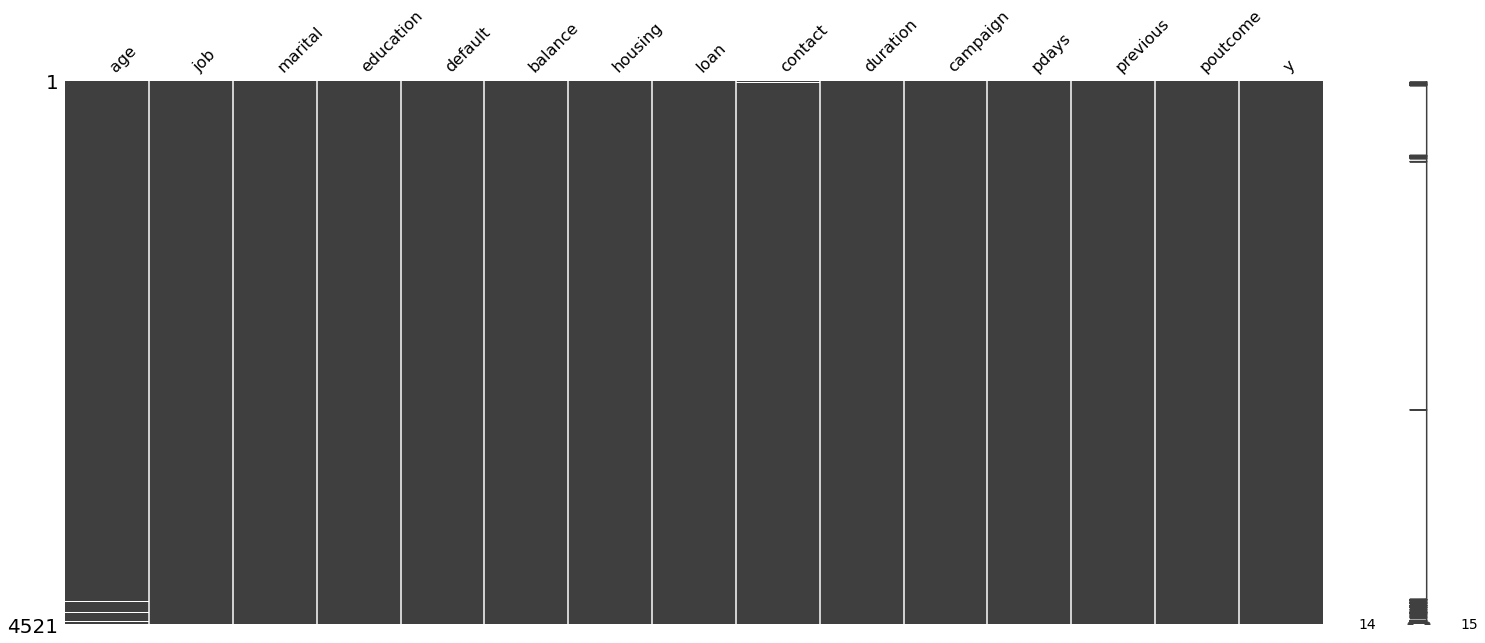

In [19]:
msno.matrix(df)

<AxesSubplot:>

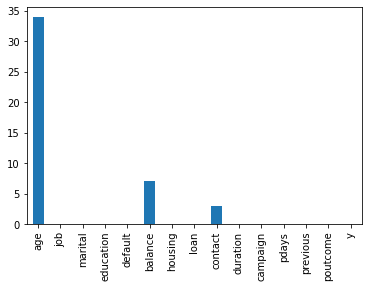

In [20]:
df.isnull().sum().plot(kind='bar')

In [21]:
nullAge = df.age.isnull()
df[nullAge].head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
19,NaN,services,married,secondary,no,132.0,no,no,cellular,148,1,152,1,other,no
22,NaN,services,single,secondary,no,106.0,no,no,unknown,109,2,-1,0,unknown,no
31,NaN,technician,married,secondary,no,171.0,no,no,cellular,81,3,-1,0,unknown,no
34,NaN,technician,married,tertiary,no,1235.0,no,no,cellular,354,3,-1,0,unknown,yes
40,NaN,management,single,tertiary,no,11971.0,yes,no,unknown,609,2,101,3,failure,no


In [22]:
df.age = df.age.fillna(df.age.mean()) #eksik verilerin ortalamalarla giderilmesi
df.age = df.age.astype(int) #değişen veri tipinin düzeltilmesi, ilerde işlem yaparken problem çıkmaması adına

In [23]:
df.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      7
housing      0
loan         0
contact      3
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
nullBalance = df.balance.isnull()  #balance sütunundaki eksik verilerin kontrolü
df[nullBalance]

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
4323,83,retired,divorced,primary,no,NaN,no,no,telephone,664,1,77,3,success,no
4341,33,technician,divorced,secondary,no,NaN,no,no,cellular,224,8,-1,0,unknown,no
4347,32,admin.,married,secondary,no,NaN,yes,yes,cellular,159,2,195,2,failure,no
4366,59,retired,married,secondary,no,NaN,no,no,unknown,812,1,-1,0,unknown,yes
4380,57,housemaid,married,secondary,no,NaN,no,no,cellular,197,2,-1,0,unknown,no
4381,43,services,divorced,secondary,no,NaN,no,no,cellular,106,4,-1,0,unknown,no
4427,42,self-employed,married,tertiary,no,NaN,no,no,cellular,118,6,-1,0,unknown,no


In [25]:
df.balance = df.balance.interpolate("linear")  #balance sütunundaki eksik verilerin lineer regresyon ile doldurulması

In [26]:
df.contact.value_counts()  #eksik veri bulunan contact sütununun incelenmesi

cellular     2894
unknown      1324
telephone     300
Name: contact, dtype: int64

In [27]:
df.contact.fillna(lambda x: x.fillna(x.value_counts().index[0]),inplace=True) #en çok tekrar eden değer ile eksik veri giderimi

In [28]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [29]:
#Eksik veri kalmadığı için aykırılık durumlarını incelemeye geçilir

# Aykırı Veri Tespiti

In [30]:
df.age.describe()

count    4521.000000
mean       41.206591
std        10.560540
min        19.000000
25%        33.000000
50%        40.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

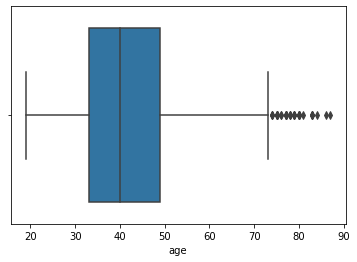

In [31]:
sns.boxplot(df.age)  #sürekli verilerde aykırılık olup olmadığına bakmak ve veri dağılımını görmek için boxplot kullanılır

In [32]:
df.age.skew() #aykırılık değerine bakılır /skew fonksiyonu için

0.6942873676392866

In [33]:
age = df.age

In [34]:
q1=age.quantile(0.25)
q3=age.quantile(0.75)
iqr=q3-q1
alt_age=q1-1.5*iqr
ust_age=q3+1.5*iqr

In [35]:
alt_age

9.0

In [36]:
ust_age

73.0

In [37]:
aykiri_age = ((age<alt_age)|(age>ust_age))
aykiri_age

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Name: age, Length: 4521, dtype: bool

In [38]:
age[aykiri_age]

36      78
129     77
166     78
199     75
412     75
477     77
573     81
633     83
688     80
1126    77
1230    75
1312    80
1349    83
1415    75
1422    79
1437    77
1866    86
1949    78
1956    77
2014    74
2070    80
2678    74
2848    80
2896    80
3157    75
3193    76
3202    79
3205    77
3311    87
3360    79
3495    76
3690    80
3750    79
3786    74
4047    75
4108    84
4323    83
4388    83
Name: age, dtype: int32

In [39]:
age[aykiri_age].index

Int64Index([  36,  129,  166,  199,  412,  477,  573,  633,  688, 1126, 1230,
            1312, 1349, 1415, 1422, 1437, 1866, 1949, 1956, 2014, 2070, 2678,
            2848, 2896, 3157, 3193, 3202, 3205, 3311, 3360, 3495, 3690, 3750,
            3786, 4047, 4108, 4323, 4388],
           dtype='int64')

In [40]:
ortalama_age = age.mean()
ortalama_age

41.206591462065916

In [41]:
age[aykiri_age] = ortalama_age

<ipython-input-41-0f47db3659e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age[aykiri_age] = ortalama_age


In [42]:
df.age.skew()

0.46479722047089006

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

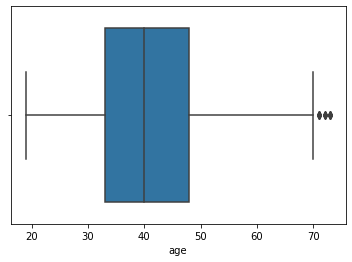

In [43]:
sns.boxplot(df.age) #aykırılıkların giderildiği görüntülenir

<AxesSubplot:>

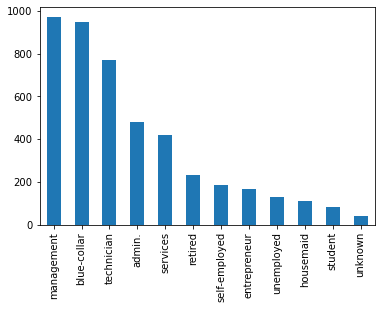

In [44]:
df.job.value_counts().plot(kind='bar')

<AxesSubplot:>

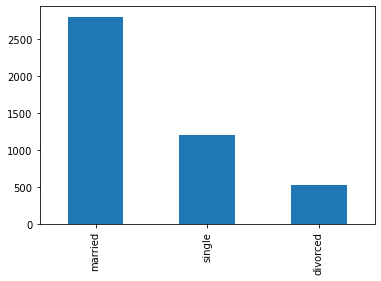

In [45]:
df.marital.value_counts().plot(kind='bar')

<AxesSubplot:>

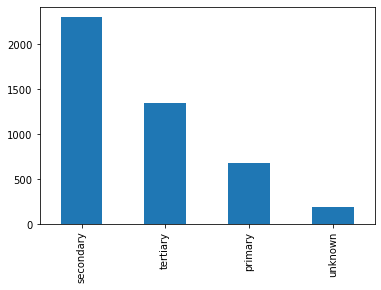

In [46]:
df.education.value_counts().plot(kind='bar')

<AxesSubplot:>

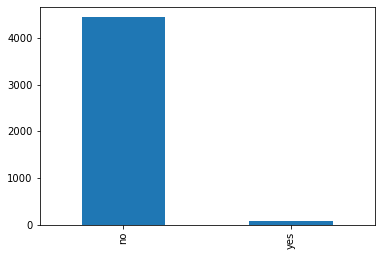

In [47]:
df.default.value_counts().plot(kind='bar')

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

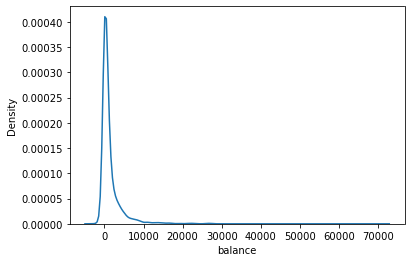

In [48]:
sns.distplot(df.balance, hist = False)

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

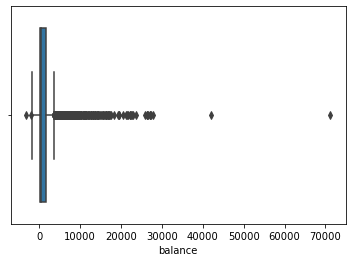

In [49]:
sns.boxplot(df.balance)

In [50]:
df.balance.skew()

6.5926332414454585

In [51]:
balance = df.balance

In [52]:
q1=balance.quantile(0.25)
q3=balance.quantile(0.75)
iqr=q3-q1
alt_balance=q1-1.5*iqr
ust_balance=q3+1.5*iqr

In [53]:
print("alt: " +str(alt_balance) + " üst: " + str(ust_balance) )

alt: -2057.5 üst: 3618.5


In [54]:
aykiri_balance = ((balance<alt_balance)|(balance>ust_balance))
aykiri_balance

0       False
1        True
2       False
3       False
4       False
        ...  
4516    False
4517     True
4518    False
4519    False
4520    False
Name: balance, Length: 4521, dtype: bool

In [55]:
balance[aykiri_balance]

1       4789.0
10      9374.0
16      4073.0
25      5883.0
30      4189.0
         ...  
4464    4554.0
4473    4790.0
4489    6945.0
4500    4196.0
4517   -3313.0
Name: balance, Length: 503, dtype: float64

In [56]:
balance[aykiri_balance].index

Int64Index([   1,   10,   16,   25,   30,   38,   40,   49,   62,   64,
            ...
            4441, 4451, 4453, 4456, 4457, 4464, 4473, 4489, 4500, 4517],
           dtype='int64', length=503)

In [57]:
ortalama_balance = balance.mean()
ortalama_balance

1425.4744525547446

In [58]:
balance[aykiri_balance] = ortalama_balance

<ipython-input-58-ae3d8673a51c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balance[aykiri_balance] = ortalama_balance


In [59]:
df.balance.skew()

1.061060539227698

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

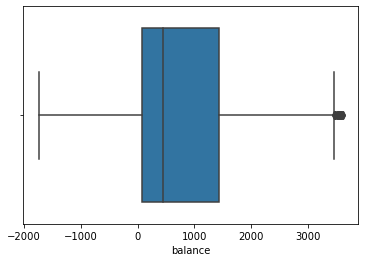

In [60]:
sns.boxplot(df.balance) #aykırlıkların gideirldiğini görüntüleriz

<AxesSubplot:>

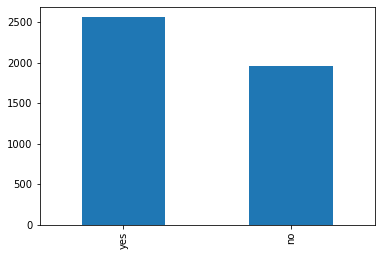

In [61]:
df.housing.value_counts().plot(kind='bar')

<AxesSubplot:>

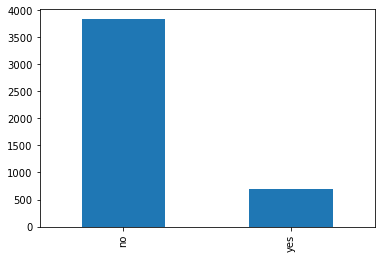

In [62]:
df.loan.value_counts().plot(kind='bar')

<AxesSubplot:>

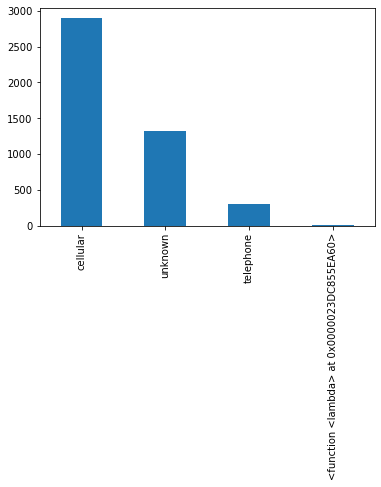

In [63]:
df.contact.value_counts().plot(kind='bar')

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

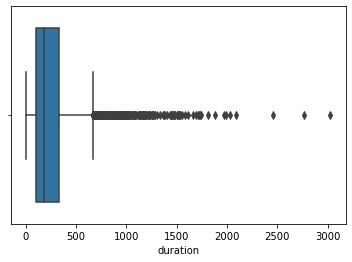

In [64]:
sns.boxplot(df.duration)

In [65]:
df.duration.skew()

2.7724197169136455

In [66]:
duration = df.duration

In [67]:
q1=duration.quantile(0.25)
q3=duration.quantile(0.75)
iqr=q3-q1
alt_duration=q1-1.5*iqr
ust_duration=q3+1.5*iqr

In [68]:
print("alt: " +str(alt_duration) + " üst: " + str(ust_duration) )

alt: -233.5 üst: 666.5


In [69]:
aykiri_duration = ((duration<alt_duration)|(duration>ust_duration))
aykiri_duration

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Name: duration, Length: 4521, dtype: bool

In [70]:
duration[aykiri_duration]

30       897
33       958
38       765
50      1018
51      1740
        ... 
4498     676
4503     816
4504     951
4505    1234
4511    1263
Name: duration, Length: 330, dtype: int64

In [71]:
duration[aykiri_duration].index

Int64Index([  30,   33,   38,   50,   51,   78,   99,  123,  125,  164,
            ...
            4407, 4417, 4447, 4480, 4495, 4498, 4503, 4504, 4505, 4511],
           dtype='int64', length=330)

In [72]:
ortalama_duration = duration.mean()
ortalama_duration

263.96129174961294

In [73]:
duration[aykiri_duration] = ortalama_duration

<ipython-input-73-68000be54cd8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[aykiri_duration] = ortalama_duration


In [74]:
df.duration.skew()

0.9950935564767309

D:\Programs\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

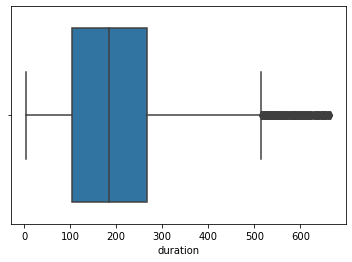

In [75]:
sns.boxplot(df.duration) #aykırılıkların giderildiğini görüntüleriz

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

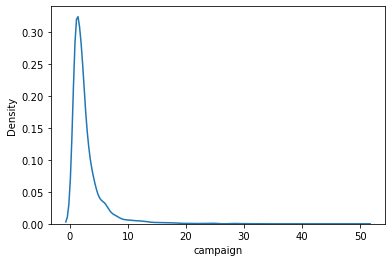

In [76]:
sns.distplot(df.campaign, hist = False)

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

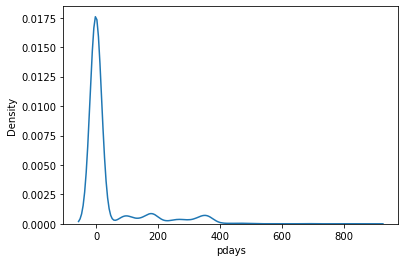

In [77]:
sns.distplot(df.pdays, hist = False)

<AxesSubplot:>

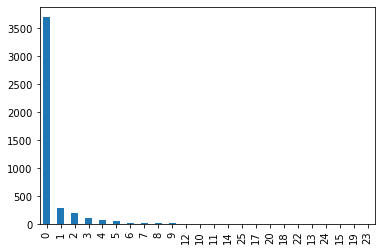

In [78]:
df.previous.value_counts().plot(kind='bar')

<AxesSubplot:>

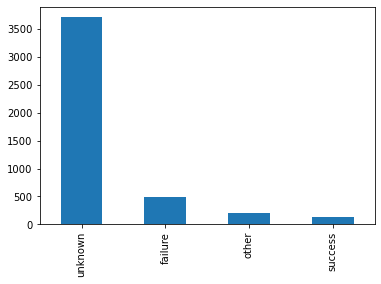

In [79]:
df.poutcome.value_counts().plot(kind='bar')

<AxesSubplot:>

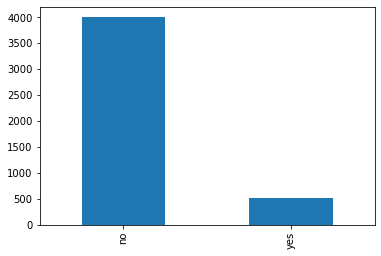

In [80]:
df.y.value_counts().plot(kind='bar')

# Metodoloji

<h3> Kullanılacak Algoritmalar </h3>
-- K-Nearest Neigbors Classifier <br>
-- Random Forest Classifier <br>
-- Logistic Regression <br>

In [81]:
#Bu aşamadan sonra kullanılacak kütüphanelerin yüklenmesi
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [82]:
#Verilerin algoritmalarda kullanılması için normalizasyonu ve scale edilmesi
df.job = df.job.replace(['management','blue-collar','technician','admin.','services','retired',
                         'self-employed','entrepreneur','unemployed','housemaid','student','unknown'],
                        [1.1, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0])
df.marital = df.marital.replace(['married','single','divorced'], [1.0, 0.5, 0.0])
df.education = df.education.replace(['secondary','tertiary','primary','unknown'], [1.5, 1.0, 0.5, 0.0])
df.default = df.default.replace(['yes','no'], [1.0,0.0])
df.housing = df.housing.replace(['yes','no'], [1.0,0.0])
df.loan = df.loan.replace(['yes','no'], [1.0,0.0])
df = df.drop(["contact"], axis=1) #yaşanılan problemlerden dolayı contact sütunu silindi
df.poutcome = df.poutcome.replace(['success','other','failure','unknown'], [1.5, 1.0, 0.5, 0.0])
df.y = df.y.replace(['yes','no'], [1,0])
df['campaign'] = df['campaign'].astype(float)
df['pdays'] = df['pdays'].astype(float)
df['previous'] = df['previous'].astype(float)
df['y'] = df['y'].astype(float)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   float64
 2   marital    4521 non-null   float64
 3   education  4521 non-null   float64
 4   default    4521 non-null   float64
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   float64
 7   loan       4521 non-null   float64
 8   duration   4521 non-null   float64
 9   campaign   4521 non-null   float64
 10  pdays      4521 non-null   float64
 11  previous   4521 non-null   float64
 12  poutcome   4521 non-null   float64
 13  y          4521 non-null   float64
dtypes: float64(14)
memory usage: 494.6 KB


<h3> Verilerin test, train, input, output olarak ayrılması </h3>

In [84]:
y = df.y

In [85]:
y.value_counts()

0.0    4000
1.0     521
Name: y, dtype: int64

In [86]:
y = y.values.ravel()

In [87]:
X=df.drop(["y"],axis=1)
X.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [88]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.30,random_state=42,stratify=y)

In [89]:
#Veri standardizasyonu
from sklearn.preprocessing import RobustScaler
rsc = RobustScaler()
X_train = rsc.fit_transform(X_train)
X_test = rsc.fit_transform(X_test)

In [90]:
knn = KNeighborsClassifier(n_neighbors = 5,metric = 'euclidean') #kullanacağımız algoritmalardan knn'in hiçbir özellik seçimi, 
#parametre ayarlaması yapılmadan çalıştırılıp, denenmesi

In [91]:
knn_model=knn.fit(X_train,y_train)

In [92]:
knn_y_pred=knn_model.predict(X_test)

In [93]:
accuracy_score(y_test,knn_y_pred)

0.8776713338246132

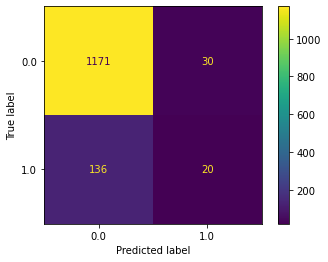

In [94]:
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

# Özellik Seçimi

In [95]:
names = X.columns

In [96]:
names

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [97]:
#RFE recursive feature elimination yöntemi ile verilen X değerleri arasından özellik seçimi yapılması
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lnr = LinearRegression()
rfe = RFE(lnr,7)
x = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'duration',
     'campaign', 'pdays', 'previous', 'poutcome']
rfe = rfe.fit(X_train, y_train)
rfe.support_

D:\Programs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([False, False,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True])

In [98]:
#marital, default, balance, housing , loan, duration,  poutcome

In [99]:
X = X.drop(columns=['age', 'job', 'education', 'campaign', 'pdays', 'previous'])
X

,marital,default,balance,housing,loan,duration,poutcome
0,1.0,0.0,1787.000000,0.0,0.0,79.0,0.0
1,1.0,0.0,1425.474453,1.0,1.0,220.0,0.5
2,0.5,0.0,1350.000000,1.0,0.0,185.0,0.5
3,1.0,0.0,1476.000000,1.0,1.0,199.0,0.0
4,1.0,0.0,0.000000,1.0,0.0,226.0,0.0
...,...,...,...,...,...,...,...
4516,1.0,0.0,-333.000000,1.0,0.0,329.0,0.0
4517,1.0,1.0,1425.474453,1.0,1.0,153.0,0.0
4518,1.0,0.0,295.000000,0.0,0.0,151.0,0.0
4519,1.0,0.0,1137.000000,0.0,0.0,129.0,1.0


In [100]:
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.30,random_state=42,stratify=y)

# Tekrarlı Öğrenme, Model Seçimi ve Hiperparametreler

<h3> -Logistic Regression </h3>

In [101]:
parameters = {'C': [0.001,0.01,0.1,1,10,100]} 
logregCV = GridSearchCV(LogisticRegression(penalty='l2'),param_grid=parameters)
logregCV  #gridsearchcv ile logistic regression için hiperparametre ayarlaması parametereleri girildi  

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [102]:
logregCV.fit(X_train,y_train) #X ve y değerleri fit edildi

D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [103]:
logregBestEst = logregCV.best_estimator_
logregBestEst.fit(X_train,y_train) #hiperparametere ayarlaması tamamlandı

LogisticRegression(C=0.1)

In [104]:
logreg_BestSc=logregCV.best_score_
logreg_BestSc

0.8912772211890335

In [105]:
#tekrarlamalı ayırma, öğrenme aşaması
repeat = 40
logregAccuracy = []
for i in range(repeat):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = i, stratify=y)

    X_train = StandardScaler().fit_transform(X_train) # robustScaler burada başarıyı etkilediği için standart scaler kullanıldı
    X_test = StandardScaler().fit_transform(X_test)
    
    logregBestEst.fit(X_train, y_train)    
    logregRepeatAccuracy = logregBestEst.score(X_test, y_test)
    logregAccuracy.append(logregRepeatAccuracy)


In [106]:
np.asarray(logregAccuracy).mean()

0.8918754605747974

<h3> -Random Forest Classifier </h3>

In [152]:
parameters = {'n_estimators': [200, 400, 600, 800],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [10, 20, 30, None]}
randomforestCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters)
randomforestCV

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600, 800]})

In [153]:
randomforestCV.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 400, 600, 800]})

In [154]:
randomforestBestEst = randomforestCV.best_estimator_
randomforestBestEst.fit(X_train,y_train) #hiperparametere ayarlaması tamamlandı

RandomForestClassifier(max_depth=10, n_estimators=400)

In [155]:
randomforestCV.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 400}

In [156]:
#tekrarlamalı ayırma, öğrenme aşaması
repeat = 40
randomforestAccuracy = []
for i in range(repeat):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = i, stratify=y)

    X_train = RobustScaler().fit_transform(X_train) 
    X_test = RobustScaler().fit_transform(X_test)
    
    randomforestBestEst.fit(X_train, y_train)    
    randomforestRepeatAccuracy = randomforestBestEst.score(X_test, y_test)
    randomforestAccuracy.append(randomforestRepeatAccuracy)


In [157]:
np.asarray(randomforestAccuracy).mean()

0.8914701547531318

<h3> -K-Nearest Neighbors Classifier </h3>

In [158]:
parameters = {"n_neighbors" : np.arange(1,50)}
knnCV= GridSearchCV(KNeighborsClassifier(), parameters,cv=5,
                     n_jobs = -1,return_train_score = "true")
knnCV

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score='true')

In [159]:
knnCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score='true')

In [160]:
knnBestEst = knnCV.best_estimator_
knnBestEst.fit(X_train,y_train) #hiperparametere ayarlaması tamamlandı

KNeighborsClassifier(n_neighbors=17)

In [161]:
knnCV.best_params_

{'n_neighbors': 17}

In [162]:
knn_BestSc=knnCV.best_score_
knn_BestSc

0.891276221329014

In [163]:
#tekrarlamalı ayırma, öğrenme aşaması
repeat = 40
knnAccuracy = []
for i in range(repeat):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = i, stratify=y)

    X_train = RobustScaler().fit_transform(X_train) 
    X_test = RobustScaler().fit_transform(X_test)
    
    knnBestEst.fit(X_train, y_train)    
    knnRepeatAccuracy = knnBestEst.score(X_test, y_test)
    knnAccuracy.append(knnRepeatAccuracy)


In [164]:
np.asarray(knnAccuracy).mean()

0.8913780397936625

# Model Değerlendirme ve Kıyaslama

<h3> Logistic Regression </h3>

In [165]:
logreg_y_pred = logregBestEst.predict(X_test)
lr_accuracy = accuracy_score(y_test, logreg_y_pred)
lr_accuracy

0.8835666912306559

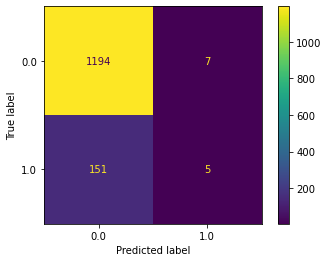

In [166]:
plot_confusion_matrix(logregBestEst,X_test,y_test)
plt.show()

In [167]:
print(classification_report(y_test,logreg_y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      1201
         1.0       0.42      0.03      0.06       156

    accuracy                           0.88      1357
   macro avg       0.65      0.51      0.50      1357
weighted avg       0.83      0.88      0.84      1357



<h3> Random Forest </h3>

In [168]:
randomforest_y_pred = randomforestBestEst.predict(X_test)
rf_accuracy = accuracy_score(y_test, randomforest_y_pred)
rf_accuracy

0.8909358879882093

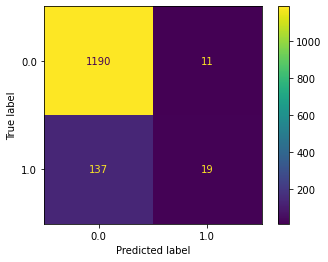

In [169]:
plot_confusion_matrix(randomforestBestEst,X_test,y_test)
plt.show() #random forest confusion matrix gösterimi

In [170]:
print(classification_report(y_test,randomforest_y_pred)) # başarı ölçütü değerlerinin gösterimi

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1201
         1.0       0.63      0.12      0.20       156

    accuracy                           0.89      1357
   macro avg       0.77      0.56      0.57      1357
weighted avg       0.87      0.89      0.86      1357



<h3> K-Nearest Neighbors

In [171]:
knn_y_pred = knnBestEst.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_accuracy

0.887988209285188

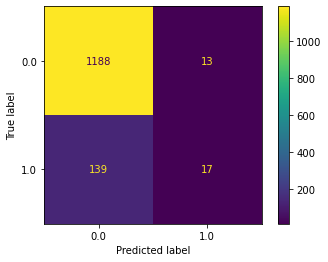

In [172]:
plot_confusion_matrix(knnBestEst,X_test,y_test)
plt.show()

In [173]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1201
         1.0       0.57      0.11      0.18       156

    accuracy                           0.89      1357
   macro avg       0.73      0.55      0.56      1357
weighted avg       0.86      0.89      0.85      1357



K-Nearest Neigbors Classifer Accuracy:   0.887988209285188
Random Forest Classifier Accuracy:       0.8909358879882093
Logistic Regression Accuracy:            0.8835666912306559


Text(0.5, 1.0, 'Model Accuracy')

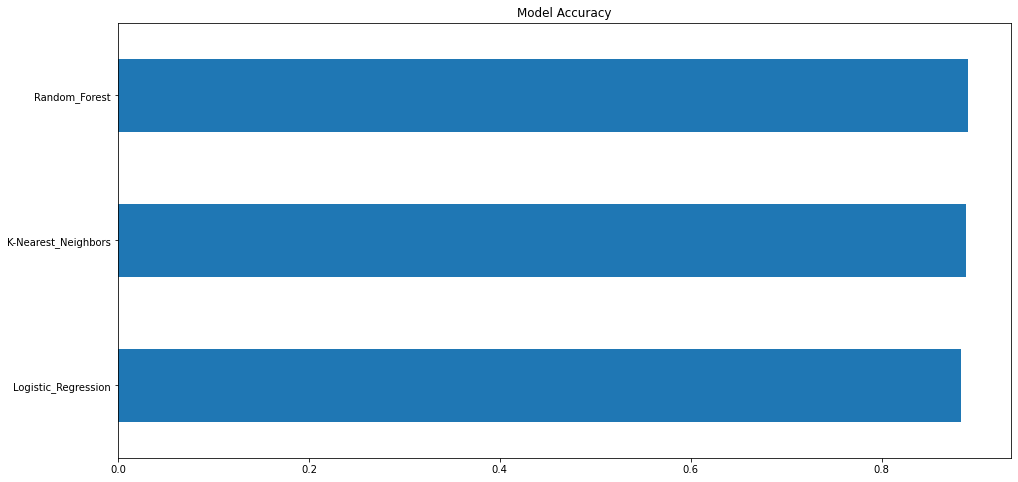

In [174]:
print("K-Nearest Neigbors Classifer Accuracy:   " + str(knn_accuracy) + 
      "\nRandom Forest Classifier Accuracy:       " + str(rf_accuracy) + 
      "\nLogistic Regression Accuracy:            " +str(lr_accuracy))
%matplotlib inline
model_accuracy = pd.Series(data=[lr_accuracy,rf_accuracy,knn_accuracy], 
        index=['Logistic_Regression','Random_Forest','K-Nearest_Neighbors'])
fig= plt.figure(figsize=(16,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

# Sonuçlar

Algoritmaların başarılarını kıyasladığımızda <br> **Random Forest&emsp;>&emsp;K-Nearest Neigbors&emsp;>&emsp;Logistic Regression** <br>olduğunu görüntüleriz. Ancak çok da büyük farklar olduğunu söyleyemeyiz. Sonuç kısmında ise dikkatimi en çok çeken kısım burası oldu. Farklı algoritma ve parametreler kullanarak elde ettiğimiz sonuçlar çok küçük farklılıklarla birbirinden ayrılıyor olması ilgimi çekti. 


# Ders Genel Değerlendirme

Veri bilimiyle yakından ilgilenen bir öğrenci olarak oldukça verimli geçtiğini söyleyebileceğim bir ders dönemi oldu. Veri analizi, önişleme anlamında yapılabilecek her adımın detaylı bir şekilde anlatıldığını düşünüyorum. 